## Libraries

In [ ]:
## install relevant libraries

!pip install torch torchvision matplotlib

In [ ]:
## import libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from PIL import Image
from sklearn.model_selection import train_test_split

## 1) Mount google drive & load data

https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/data

In [ ]:
## mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## image data preparation

data_dir = '/content/drive/MyDrive/Colab Notebooks/Nusantara Project'

data_transforms = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# .ToTensor() scales pixel values from 0-255 (common for image data) to range of 0-1. This conversion is imp because PyTorch models work with tensors, not raw images.

# .Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#   - normalizes COLOR image's pixel values using mean and standard deviation for each color channel. this makes the pixel values have a mean of 0 and a standard deviation of 1, which helps the neural network learn more efficiently.

# .Normalize([0.5], [0.5])
#   - nromalizes GREYSCALE images to have values in range [-1, 1]

In [ ]:
## load dataset

dataset = datasets.ImageFolder(data_dir, transform=data_transforms)

## Display loaded images

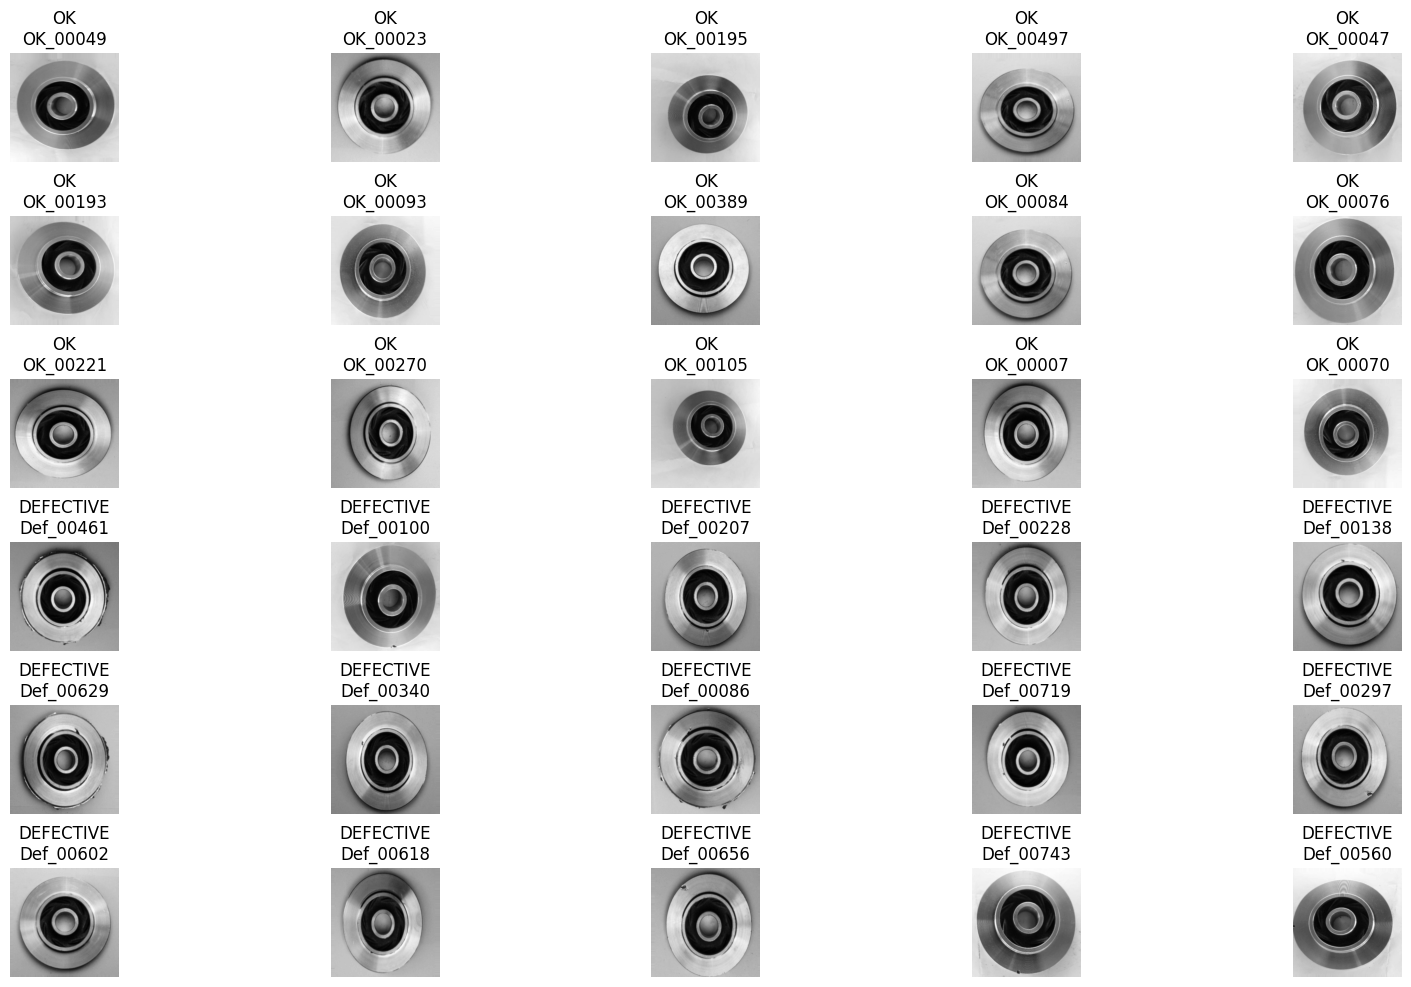

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from torch.utils.data import Subset

# Define the imshow function for displaying images
def imshow(inp, title, filename):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5])
    std = np.array([0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp.squeeze(), cmap='gray')  # Display in grayscale
    plt.title(f'{title}\n{filename}')
    plt.axis('off')

# Shuffle the dataset and pick 15 images from each class
# Dataset labels are automatically created by ImageFolder:
# 0 for OK and 1 for DEFECTIVE based on the folder names

# Get the indices for OK (label=0) and DEFECTIVE (label=1) images
ok_indices = [i for i, label in enumerate(dataset.targets) if label == 1]
def_indices = [i for i, label in enumerate(dataset.targets) if label == 0]

# Shuffle the indices
random.shuffle(ok_indices)
random.shuffle(def_indices)

# Pick the first 15 images from each class after shuffling
ok_images = Subset(dataset, ok_indices[:15])
def_images = Subset(dataset, def_indices[:15])

# Create a figure to display images
fig = plt.figure(figsize=(20, 12))

# Display OK images (first 15)
for i in range(15):
    img, label = ok_images[i]  # img is the image tensor, label is the class (0 for OK)
    path, _ = dataset.samples[ok_indices[i]]  # Get the path of the image
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    imshow(img, "OK", os.path.basename(path).split('.')[0])

# Display DEFECTIVE images (next 15)
for i in range(15):
    img, label = def_images[i]  # img is the image tensor, label is the class (1 for DEFECTIVE)
    path, _ = dataset.samples[def_indices[i]]  # Get the path of the image
    ax = fig.add_subplot(6, 5, i + 16, xticks=[], yticks=[])
    imshow(img, "DEFECTIVE", os.path.basename(path).split('.')[0])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5)
plt.show()


## Check numbers of images -- check if data imbalance

Number of OK images: 519
Number of DEFECTIVE images: 781
Total number of images: 1300


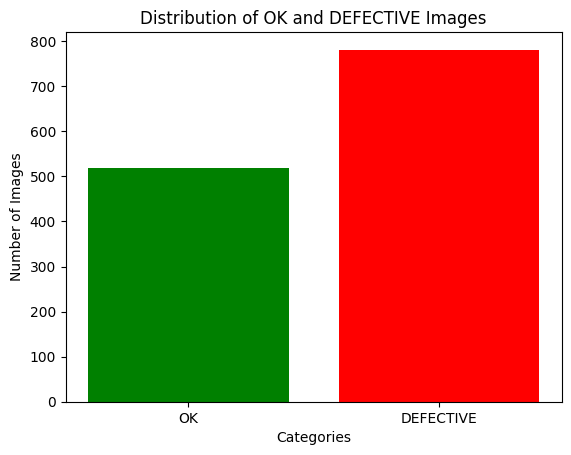

In [ ]:
## get number of OK and DEFECTIVE images -- count based on the labels in folder

# Count the number of OK and DEFECTIVE images based on their labels (1 for OK, 0 for DEFECTIVE)
ok_count = len([label for label in dataset.targets if label == 1])
def_count = len([label for label in dataset.targets if label == 0])

print(f'Number of OK images: {ok_count}')
print(f'Number of DEFECTIVE images: {def_count}')
print(f'Total number of images: {ok_count + def_count}')

## visualize the distribution

labels = ['OK', 'DEFECTIVE']
counts = [ok_count, def_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of OK and DEFECTIVE Images')
plt.show()

## dataset.targets: a list of the labels assigned to each image in the dataset.

## Perform Train-Val-Test split

In [ ]:
## perform train-val-test split -- using dataset.target (labels)
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# get the indices for OK (label=1) and DEFECTIVE (label=0) images
ok_indices = [i for i, label in enumerate(dataset.targets) if label == 1]
def_indices = [i for i, label in enumerate(dataset.targets) if label == 0]

# perform train-val-test split (60% train, 20% val+test, 20% test)
ok_train, ok_temp = train_test_split(ok_indices, test_size=0.4, random_state=42)
ok_val, ok_test = train_test_split(ok_temp, test_size=0.5, random_state=42)

def_train, def_temp = train_test_split(def_indices, test_size=0.4, random_state=42)
def_val, def_test = train_test_split(def_temp, test_size=0.5, random_state=42)

# create subsets for train, validation, and test -- for later training, validation and testing purpose
ok_train_dataset = Subset(dataset, ok_train)
ok_val_dataset = Subset(dataset, ok_val)
ok_test_dataset = Subset(dataset, ok_test)

def_train_dataset = Subset(dataset, def_train)
def_val_dataset = Subset(dataset, def_val)
def_test_dataset = Subset(dataset, def_test)

# Print the counts
print(f'Number of OK images: {len(ok_indices)}')
print(f'Number of OK images in train: {len(ok_train)}')
print(f'Number of OK images in val: {len(ok_val)}')
print(f'Number of OK images in test: {len(ok_test)}\n')

print(f'Number of DEFECTIVE images: {len(def_indices)}')
print(f'Number of DEFECTIVE images in train: {len(def_train)}')
print(f'Number of DEFECTIVE images in val: {len(def_val)}')
print(f'Number of DEFECTIVE images in test: {len(def_test)}')


Number of OK images: 519
Number of OK images in train: 311
Number of OK images in val: 104
Number of OK images in test: 104

Number of DEFECTIVE images: 781
Number of DEFECTIVE images in train: 468
Number of DEFECTIVE images in val: 156
Number of DEFECTIVE images in test: 157


In [ ]:
## saving splitted validation & testing images for later testing

import os
import shutil

# Define the directories where you want to save validation and test images
val_save_dir = '/content/drive/MyDrive/Colab Notebooks/Nusantara Project/validation_images'
test_save_dir = '/content/drive/MyDrive/Colab Notebooks/Nusantara Project/test_images'

# Create directories if they don't exist
os.makedirs(val_save_dir, exist_ok=True)
os.makedirs(test_save_dir, exist_ok=True)

# Function to copy images to the destination folder
def save_images_from_subset(subset_indices, dest_folder, dataset):
    for idx in subset_indices:
        img_path, _ = dataset.samples[idx]  # Get the image path
        img_filename = os.path.basename(img_path)  # Get the file name
        dest_path = os.path.join(dest_folder, img_filename)
        shutil.copy(img_path, dest_path)  # Copy the image to the destination folder

# Save validation images
save_images_from_subset(ok_val + def_val, val_save_dir, dataset)
print(f'Validation images saved to {val_save_dir}')

# Save test images
save_images_from_subset(ok_test + def_test, test_save_dir, dataset)
print(f'Test images saved to {test_save_dir}')


Validation images saved to /content/drive/MyDrive/Colab Notebooks/Nusantara Project/validation_images
Test images saved to /content/drive/MyDrive/Colab Notebooks/Nusantara Project/test_images


In [ ]:
## increasing number of data to 1500 for each class.
# randomly augment and repeat the original images until reach the desired number.

import random
from torchvision import datasets
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# Set up the augmentation transformation
aug_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    #transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


# Calculate the number of additional samples needed for each class in the training set
num_ok_needed = 1500 - len(ok_train)
num_def_needed = 1500 - len(def_train)

# Randomly select indices from the training set to augment (with replacement)
augmented_ok_indices = random.choices(ok_train, k=num_ok_needed)
augmented_def_indices = random.choices(def_train, k=num_def_needed)

# Combine original and augmented training indices to reach 1500 for each category
final_ok_train = ok_train + augmented_ok_indices
final_def_train = def_train + augmented_def_indices

# Apply the augmentation transform to the augmented images
ok_train_augmented = [aug_transform(Image.open(dataset.samples[i][0])) for i in augmented_ok_indices]
def_train_augmented = [aug_transform(Image.open(dataset.samples[i][0])) for i in augmented_def_indices]


# Combine the original and augmented indices
final_train_images = Subset(dataset, final_ok_train + final_def_train)

# Create validation and test subsets without augmentation
ok_val_samples = Subset(dataset, ok_val)
ok_test_samples = Subset(dataset, ok_test)
def_val_samples = Subset(dataset, def_val)
def_test_samples = Subset(dataset, def_test)


# Check the number of data
print(f'Number of OK images in training: {len(final_ok_train)}')
print(f'Number of DEFECTIVE images in training: {len(final_def_train)}')
print(f'Total number of training images: {len(final_ok_train) + len(final_def_train)}\n')

# Number of images in validation and test sets
print(f'Number of OK images in validation: {len(ok_val_samples)}')
print(f'Number of OK images in test: {len(ok_test_samples)}')
print(f'Number of DEFECTIVE images in validation: {len(def_val_samples)}')
print(f'Number of DEFECTIVE images in test: {len(def_test_samples)}')



Number of OK images in training: 1500
Number of DEFECTIVE images in training: 1500
Total number of training images: 3000

Number of OK images in validation: 104
Number of OK images in test: 104
Number of DEFECTIVE images in validation: 156
Number of DEFECTIVE images in test: 157


## Display augmented images

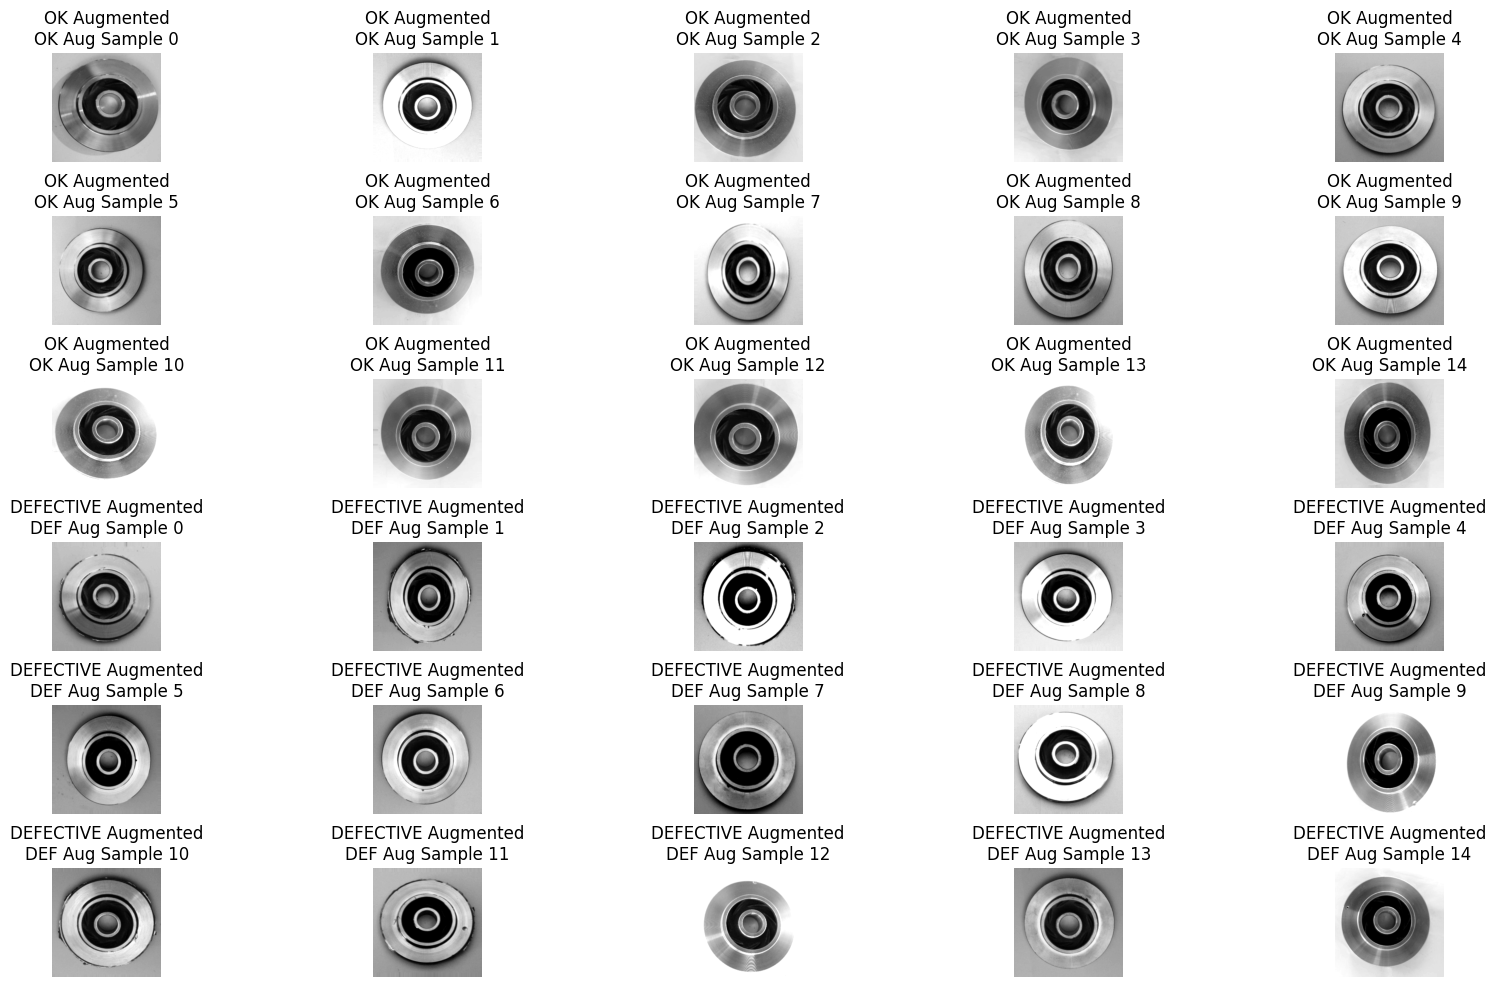

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the imshow function for displaying images
def imshow(inp, title, filename):
    # Check if the image has one channel (grayscale) and squeeze to remove singleton dimensions
    inp = inp.squeeze().numpy()
    mean = np.array([0.5])
    std = np.array([0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp, cmap='gray')  # Use grayscale colormap for display
    plt.title(f'{title}\n{filename}')
    plt.axis('off')


# Combine augmented OK and DEFECTIVE samples
# The augmented lists contain only images, so we can't unpack label information
list_augmented_ok_images = ok_train_augmented
list_augmented_def_images = def_train_augmented

# Shuffle the augmented images
random.shuffle(list_augmented_ok_images)
random.shuffle(list_augmented_def_images)

# Create a figure to display images
fig = plt.figure(figsize=(20, 12))

# Keep track of how many OK and DEFECTIVE images have been displayed
ok_displayed = 0
def_displayed = 0
total_displayed = 0

# Display 15 OK augmented images
for i in range(len(list_augmented_ok_images)):
    if ok_displayed == 15:
        break

    img = list_augmented_ok_images[i][0]  # Get the image tensor from the dataset tuple
    ax = fig.add_subplot(6, 5, total_displayed + 1, xticks=[], yticks=[])
    imshow(img, "OK Augmented", f"OK Aug Sample {i}")
    ok_displayed += 1
    total_displayed += 1

# Display 15 DEFECTIVE augmented images
for i in range(len(list_augmented_def_images)):
    if def_displayed == 15:
        break

    img = list_augmented_def_images[i][0]  # Get the image tensor from the dataset tuple
    ax = fig.add_subplot(6, 5, total_displayed + 1, xticks=[], yticks=[])
    imshow(img, "DEFECTIVE Augmented", f"DEF Aug Sample {i}")
    def_displayed += 1
    total_displayed += 1

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5)
plt.show()


## 2) Load MobileNetV2 Pre-trained Model

In [ ]:
## import necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


In [ ]:
## load MobileNetV2 pre-trained model -- which is available in pyTorch.
# lighter and more efficient

model = models.mobilenet_v2(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 121MB/s]


In [ ]:
## Modify the first layer to accept 1 input channel (for grayscale images)
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


In [ ]:
## replace the final fully connected layers to adapt to my 2-class problem (OK / DEFECTIVE)
# originally it is designed for 1000 classes in ImageNet

num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 2)
# model.classifier[1].in_features gives the number of input features for the last layer.


In [ ]:
## freeze the feature extraction layers
# Freeze all the layers except the classifier layer

for param in model.features.parameters():
    param.requires_grad = False

# param.requires_grad --> feature extraction layers
# requires_grad --> feature extraction + output layers
  # however, freezing the output layers won't make sence since the model won't be able to learn and adapt to my needs, becos there are no params being updated during training.

In [ ]:
## To utilize GPU acceleration in Google Colab, move the model to GPU -- M1 Mac code

# Check if MPS (Metal Performance Shaders) is available, else fall back to CPU
device = torch.device("cpu")
model = model.to(device)


In [ ]:
## Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Only train the classifier layer

# CrossEntropyLoss
# Adam optimizer: suitable for training neural networks

In [ ]:
## check the layers of MobileNetV2

from torchsummary import summary

# print model summary
summary(model, (1, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             288
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

## Training the model

In [ ]:
import time
from torch.utils.data import DataLoader
from tqdm import tqdm  # For progress bar

# Number of epochs
num_epochs = 10

# Create the DataLoader with num_workers=0 to avoid multiprocessing issues
train_loader = DataLoader(final_train_images, batch_size=32, shuffle=True, num_workers=0)

# Check if dataset is not empty
print(f'Number of training images: {len(final_train_images)}')

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()  # Set the model to training mode

    print("Starting training...")  # Debugging print

    for epoch in range(num_epochs):
        start_time = time.time()
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0
        total_samples = 0

        # Use tqdm for the progress bar to track each batch during training
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch")

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward pass + optimize
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()
            total_samples += inputs.size(0)

            # Update progress bar with current loss and accuracy
            progress_bar.set_postfix({
                "loss": running_loss / total_samples,
                "accuracy": running_corrects / total_samples
            })

        # Calculate average loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects / len(train_loader.dataset)

        epoch_time = time.time() - start_time

        # Print epoch summary like in ResNet-18
        print(f"Epoch {epoch + 1} completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")
        print(f"Training Loss at epoch {epoch + 1} is {epoch_loss:.4f}")
        print(f"Training Accuracy at epoch {epoch + 1} is {epoch_acc:.4f}\n")

    print('Training complete')
    return model  # Return the trained model

# Call train_model
train_model(model, train_loader, criterion, optimizer, num_epochs)


Number of training images: 3000
Starting training...
Epoch 1/10
----------


Epoch 1/10: 100%|██████████| 94/94 [06:24<00:00,  4.09s/batch, loss=0.413, accuracy=0.812]


Epoch 1 completed in 6m 24s
Training Loss at epoch 1 is 0.4126
Training Accuracy at epoch 1 is 0.8120

Epoch 2/10
----------


Epoch 2/10: 100%|██████████| 94/94 [05:43<00:00,  3.65s/batch, loss=0.268, accuracy=0.894]


Epoch 2 completed in 5m 43s
Training Loss at epoch 2 is 0.2677
Training Accuracy at epoch 2 is 0.8937

Epoch 3/10
----------


Epoch 3/10: 100%|██████████| 94/94 [05:54<00:00,  3.78s/batch, loss=0.237, accuracy=0.908]


Epoch 3 completed in 5m 55s
Training Loss at epoch 3 is 0.2366
Training Accuracy at epoch 3 is 0.9077

Epoch 4/10
----------


Epoch 4/10: 100%|██████████| 94/94 [05:44<00:00,  3.67s/batch, loss=0.196, accuracy=0.928]


Epoch 4 completed in 5m 45s
Training Loss at epoch 4 is 0.1958
Training Accuracy at epoch 4 is 0.9283

Epoch 5/10
----------


Epoch 5/10: 100%|██████████| 94/94 [06:05<00:00,  3.89s/batch, loss=0.187, accuracy=0.929]


Epoch 5 completed in 6m 6s
Training Loss at epoch 5 is 0.1867
Training Accuracy at epoch 5 is 0.9293

Epoch 6/10
----------


Epoch 6/10: 100%|██████████| 94/94 [05:49<00:00,  3.72s/batch, loss=0.17, accuracy=0.939]


Epoch 6 completed in 5m 49s
Training Loss at epoch 6 is 0.1697
Training Accuracy at epoch 6 is 0.9387

Epoch 7/10
----------


Epoch 7/10: 100%|██████████| 94/94 [06:00<00:00,  3.84s/batch, loss=0.158, accuracy=0.947]


Epoch 7 completed in 6m 1s
Training Loss at epoch 7 is 0.1577
Training Accuracy at epoch 7 is 0.9473

Epoch 8/10
----------


Epoch 8/10: 100%|██████████| 94/94 [05:54<00:00,  3.77s/batch, loss=0.146, accuracy=0.947]


Epoch 8 completed in 5m 55s
Training Loss at epoch 8 is 0.1457
Training Accuracy at epoch 8 is 0.9467

Epoch 9/10
----------


Epoch 9/10: 100%|██████████| 94/94 [05:44<00:00,  3.66s/batch, loss=0.138, accuracy=0.951]


Epoch 9 completed in 5m 44s
Training Loss at epoch 9 is 0.1383
Training Accuracy at epoch 9 is 0.9510

Epoch 10/10
----------


Epoch 10/10: 100%|██████████| 94/94 [05:57<00:00,  3.81s/batch, loss=0.132, accuracy=0.953]

Epoch 10 completed in 5m 58s
Training Loss at epoch 10 is 0.1322
Training Accuracy at epoch 10 is 0.9533

Training complete


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

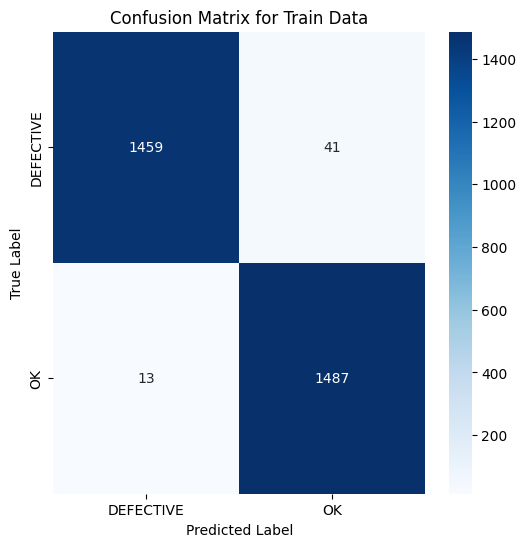

In [ ]:
## confusion matrix for training data

import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(model, dataloader, dataset_name="Train"):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculations for inference
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DEFECTIVE', 'OK'], yticklabels=['DEFECTIVE', 'OK'])
    plt.title(f'Confusion Matrix for {dataset_name} Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Create a DataLoader for the training dataset (no shuffling, since we're evaluating the model)
train_eval_loader = DataLoader(final_train_images, batch_size=32, shuffle=False)

# Plot confusion matrix for the training data
plot_confusion_matrix(model, train_eval_loader, dataset_name="Train")


In [ ]:
# Save the trained model to Google Drive

# Specify the path where you want to save the trained model
save_path = '/content/drive/MyDrive/Colab Notebooks/Nusantara Project/trained_model3.pth'

# Save the trained model to the specified path
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")


Model saved to /content/drive/MyDrive/Colab Notebooks/Nusantara Project/trained_model3.pth


## Validate Model

In [ ]:
## Validation datasets

# Combine OK and DEFECTIVE validation datasets into a single dataset
val_dataset = torch.utils.data.ConcatDataset([ok_val_dataset, def_val_dataset])

# Create DataLoader for validation dataset
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)


In [ ]:
import time
from tqdm import tqdm  # For progress bar

def validate_model(model, val_loader, criterion, num_epochs=1):
    model.eval()  # Set the model to evaluation mode

    print("Starting validation...")  # Debugging print

    for epoch in range(num_epochs):
        start_time = time.time()
        print(f'Validation Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0
        total_samples = 0

        # Use tqdm for the progress bar to track each batch during validation
        progress_bar = tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{num_epochs}", unit="batch")

        # No need to compute gradients during validation
        with torch.no_grad():
            for inputs, labels in progress_bar:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Track loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).item()
                total_samples += inputs.size(0)

                # Update progress bar with current loss and accuracy
                progress_bar.set_postfix({
                    "val_loss": running_loss / total_samples,
                    "val_accuracy": running_corrects / total_samples
                })

        # Calculate average loss and accuracy for the epoch
        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects / len(val_loader.dataset)

        epoch_time = time.time() - start_time

        # Print validation epoch summary
        print(f"Validation Epoch {epoch + 1} completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")
        print(f"Validation Loss at epoch {epoch + 1} is {epoch_loss:.4f}")
        print(f"Validation Accuracy at epoch {epoch + 1} is {epoch_acc:.4f}\n")

    print('Validation complete')
    return epoch_loss, epoch_acc  # Return the final loss and accuracy

# Call validate_model after training epochs or independently
val_loss, val_acc = validate_model(model, val_loader, criterion)


Starting validation...
Validation Epoch 1/1
----------


Validation Epoch 1/1: 100%|██████████| 9/9 [00:23<00:00,  2.62s/batch, val_loss=0.158, val_accuracy=0.954]

Validation Epoch 1 completed in 0m 24s
Validation Loss at epoch 1 is 0.1578
Validation Accuracy at epoch 1 is 0.9538

Validation complete


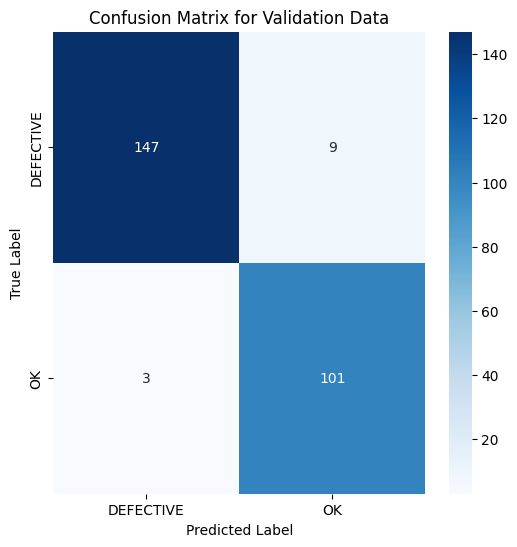

In [ ]:
## confusion matrix for validation data

import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix for validation data
def plot_confusion_matrix_for_validation(model, val_loader, dataset_name="Validation"):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculations for inference
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(preds.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DEFECTIVE', 'OK'], yticklabels=['DEFECTIVE', 'OK'])
    plt.title(f'Confusion Matrix for {dataset_name} Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to plot confusion matrix for validation data
plot_confusion_matrix_for_validation(model, val_loader, dataset_name="Validation")


## Test model

In [ ]:
# Combine OK and DEFECTIVE test datasets into a single dataset
test_dataset = torch.utils.data.ConcatDataset([ok_test_dataset, def_test_dataset])

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)


In [ ]:
import time
from tqdm import tqdm  # For progress bar

def test_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode

    print("Starting testing...")  # Debugging print

    start_time = time.time()

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    # Use tqdm for the progress bar to track each batch during testing
    progress_bar = tqdm(test_loader, desc="Testing", unit="batch")

    # No need to compute gradients during testing
    with torch.no_grad():
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Track loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()
            total_samples += inputs.size(0)

            # Update progress bar with current loss and accuracy
            progress_bar.set_postfix({
                "test_loss": running_loss / total_samples,
                "test_accuracy": running_corrects / total_samples
            })

    # Calculate average loss and accuracy for the test set
    test_loss = running_loss / len(test_loader.dataset)
    test_acc = running_corrects / len(test_loader.dataset)

    epoch_time = time.time() - start_time

    # Print test summary
    print(f"Testing completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")
    print(f"Test Loss is {test_loss:.4f}")
    print(f"Test Accuracy is {test_acc:.4f}\n")

    print('Testing complete')
    return test_loss, test_acc  # Return the final loss and accuracy

# Call test_model after training and validation
test_loss, test_acc = test_model(model, test_loader, criterion)


Starting testing...


Testing: 100%|██████████| 9/9 [00:24<00:00,  2.71s/batch, test_loss=0.15, test_accuracy=0.946]

Testing completed in 0m 24s
Test Loss is 0.1495
Test Accuracy is 0.9464

Testing complete


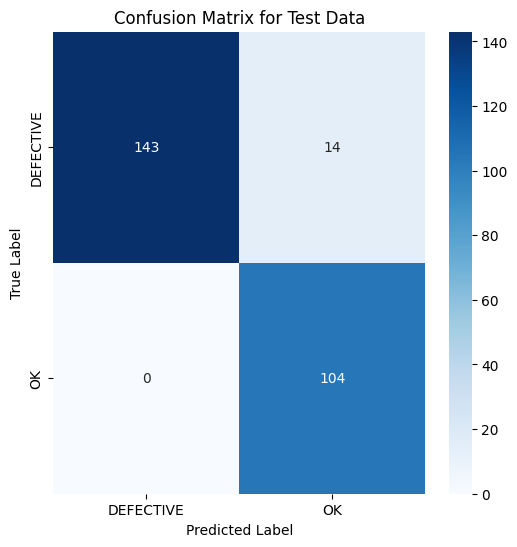

In [ ]:
## confusion matrix for testing data

import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix for test data
def plot_confusion_matrix_for_test(model, test_loader, dataset_name="Test"):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculations for inference
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(preds.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DEFECTIVE', 'OK'], yticklabels=['DEFECTIVE', 'OK'])
    plt.title(f'Confusion Matrix for {dataset_name} Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to plot confusion matrix for test data
plot_confusion_matrix_for_test(model, test_loader, dataset_name="Test")


## Plot confusion matrix

In [ ]:
# Number of epochs
num_epochs = 10

# Create the DataLoader with num_workers=0 to avoid multiprocessing issues
train_loader = DataLoader(final_train_images, batch_size=32, shuffle=True, num_workers=0)

# Combine OK and DEFECTIVE validation datasets into a single dataset
val_dataset = torch.utils.data.ConcatDataset([ok_val_dataset, def_val_dataset])

# Create DataLoader for validation dataset
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Combine OK and DEFECTIVE test datasets into a single dataset
test_dataset = torch.utils.data.ConcatDataset([ok_test_dataset, def_test_dataset])

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)


## Learning Curves

In [ ]:
## define loader
train_loader = DataLoader(final_train_images, batch_size=32, shuffle=True, num_workers=0)

# Combine OK and DEFECTIVE validation datasets into a single dataset
val_dataset = torch.utils.data.ConcatDataset([ok_val_dataset, def_val_dataset])

# Create DataLoader for validation dataset
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

num_epochs=10

In [ ]:
def train_and_validate_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_train_loss = 0.0
        running_train_corrects = 0
        total_train_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * inputs.size(0)
            running_train_corrects += torch.sum(preds == labels.data).item()
            total_train_samples += inputs.size(0)

        # Track Training Loss and Accuracy
        train_loss = running_train_loss / len(train_loader.dataset)
        train_acc = running_train_corrects / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation Phase (Run validation after each epoch)
        model.eval()  # Set the model to evaluation mode
        running_val_loss = 0.0
        running_val_corrects = 0
        total_val_samples = 0

        with torch.no_grad():  # No gradients during validation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * inputs.size(0)
                running_val_corrects += torch.sum(preds == labels.data).item()

        # Track Validation Loss and Accuracy
        val_loss = running_val_loss / len(val_loader.dataset)
        val_acc = running_val_corrects / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # Print results for each epoch
        print(f'Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        print(f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}\n')

    return train_losses, val_losses, train_accs, val_accs

# Then, plot the learning curves
train_losses, val_losses, train_accs, val_accs = train_and_validate_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/10 -> Train Loss: 0.4934, Val Loss: 0.3147
Train Acc: 0.7580, Val Acc: 0.8808

Epoch 2/10 -> Train Loss: 0.2949, Val Loss: 0.2543
Train Acc: 0.8947, Val Acc: 0.9000

Epoch 3/10 -> Train Loss: 0.2576, Val Loss: 0.2247
Train Acc: 0.9040, Val Acc: 0.9154

Epoch 4/10 -> Train Loss: 0.2218, Val Loss: 0.2132
Train Acc: 0.9190, Val Acc: 0.9192

Epoch 5/10 -> Train Loss: 0.2054, Val Loss: 0.1874
Train Acc: 0.9310, Val Acc: 0.9231

Epoch 6/10 -> Train Loss: 0.1954, Val Loss: 0.1997
Train Acc: 0.9270, Val Acc: 0.9192

Epoch 7/10 -> Train Loss: 0.1825, Val Loss: 0.1786
Train Acc: 0.9300, Val Acc: 0.9385

Epoch 8/10 -> Train Loss: 0.1638, Val Loss: 0.1727
Train Acc: 0.9440, Val Acc: 0.9423

Epoch 9/10 -> Train Loss: 0.1744, Val Loss: 0.1695
Train Acc: 0.9340, Val Acc: 0.9385

Epoch 10/10 -> Train Loss: 0.1525, Val Loss: 0.1636
Train Acc: 0.9490, Val Acc: 0.9385



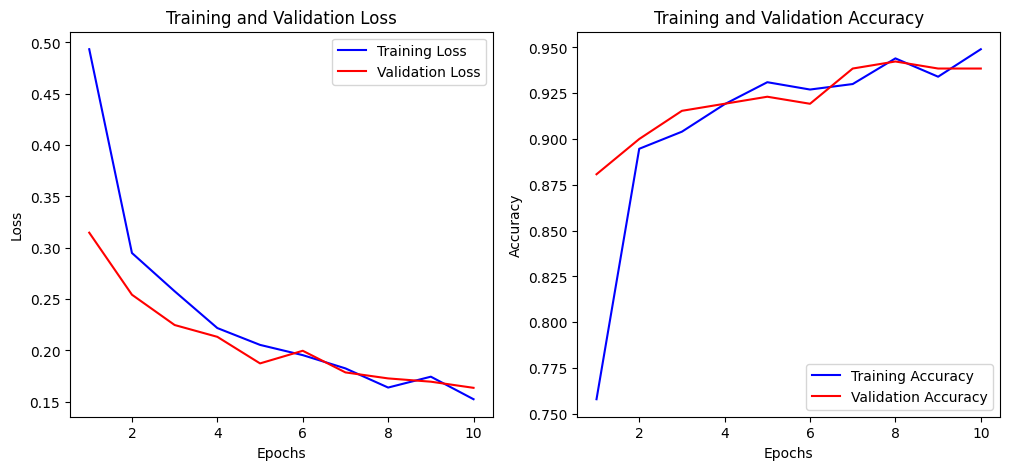

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(train_losses, val_losses, train_accs, val_accs):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss Curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b', label='Training Loss')
    plt.plot(epochs, val_losses, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy Curves
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the plotting function
plot_learning_curves(train_losses, val_losses, train_accs, val_accs)

## Cross validation to better estimate model performance

In [ ]:
from sklearn.model_selection import KFold

# Number of folds for cross-validation
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


In [ ]:
from sklearn.model_selection import KFold
import torch
import numpy as np

# Number of folds for cross-validation
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Combine OK and DEFECTIVE validation datasets into a single dataset
val_dataset = torch.utils.data.ConcatDataset([ok_val_dataset, def_val_dataset])

# Initialize lists to store results
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Loop through the k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(val_dataset)))):
    print(f'Fold {fold+1}/{k_folds}')

    # Sample elements according to the current fold split
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)

    # Create loaders for training and validation for the current fold
    train_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, sampler=train_subsampler)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, sampler=val_subsampler)

    # Initialize the saved model for each fold
    saved_model.load_state_dict(torch.load(save_path))  # Reload the saved model state dict
    saved_model = saved_model.to(device)  # Ensure it's on the correct device (GPU/CPU)

    optimizer = torch.optim.Adam(saved_model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Train and validate for each fold using the saved model
    fold_train_losses, fold_val_losses, fold_train_accs, fold_val_accs = train_and_validate_model(
        saved_model, train_loader, val_loader, criterion, optimizer, num_epochs
    )

    # Store the results from this fold
    train_losses.append(np.mean(fold_train_losses))
    val_losses.append(np.mean(fold_val_losses))
    train_accs.append(np.mean(fold_train_accs))
    val_accs.append(np.mean(fold_val_accs))

# Calculate the average across all folds
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accs)
avg_val_acc = np.mean(val_accs)

# Print the results
print(f'Average Training Loss: {avg_train_loss:.4f}')
print(f'Average Validation Loss: {avg_val_loss:.4f}')
print(f'Average Training Accuracy: {avg_train_acc:.4f}')
print(f'Average Validation Accuracy: {avg_val_acc:.4f}')


Fold 1/5


<ipython-input-31-afcb564923ef>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load(save_path))  # Reload the saved model state dict


Epoch 1/10 -> Train Loss: 0.2203, Val Loss: 0.0491
Train Acc: 0.6962, Val Acc: 0.1769

Epoch 2/10 -> Train Loss: 0.2072, Val Loss: 0.0528
Train Acc: 0.7077, Val Acc: 0.1769

Epoch 3/10 -> Train Loss: 0.1314, Val Loss: 0.0720
Train Acc: 0.7423, Val Acc: 0.1692

Epoch 4/10 -> Train Loss: 0.1743, Val Loss: 0.0469
Train Acc: 0.7308, Val Acc: 0.1808

Epoch 5/10 -> Train Loss: 0.1366, Val Loss: 0.0577
Train Acc: 0.7462, Val Acc: 0.1769

Epoch 6/10 -> Train Loss: 0.1509, Val Loss: 0.0550
Train Acc: 0.7385, Val Acc: 0.1769

Epoch 7/10 -> Train Loss: 0.1185, Val Loss: 0.0530
Train Acc: 0.7538, Val Acc: 0.1769

Epoch 8/10 -> Train Loss: 0.1312, Val Loss: 0.0594
Train Acc: 0.7538, Val Acc: 0.1769

Epoch 9/10 -> Train Loss: 0.1188, Val Loss: 0.0478
Train Acc: 0.7500, Val Acc: 0.1808

Epoch 10/10 -> Train Loss: 0.1332, Val Loss: 0.0524
Train Acc: 0.7462, Val Acc: 0.1769

Fold 2/5
Epoch 1/10 -> Train Loss: 0.2078, Val Loss: 0.0253
Train Acc: 0.7192, Val Acc: 0.1923

Epoch 2/10 -> Train Loss: 0.1971,